# 파이썬 머신러닝 완벽가이드 - part2

#### sklearn을 중심으로 python에서 ML을 다루는 과정에 대해 정리하였습니다.
#### Python 3.7 버전에서 작성되었으며, 파이썬 머신러닝 완벽 가이드(권철민 지음)을 참고하여 작성하였습니다.

## 2. 사이킷런으로 시작하는 머신러닝
### 2.1 사이킷런 소개와 특징
#### - 사이킷런은 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공한다. 
#### - 파이썬스러운 API를 제공
#### - 다양한 머신러닝 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공
#### - 다양한 환경에서 사용되는 성숙한 라이브러리

In [1]:
import sklearn
print(sklearn.__version__)
print("-----------------------------------")

0.24.2
-----------------------------------


### 2.2 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기 

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
iris_data = iris.data # iris 데이터 세트에서 피처만으로 된 데이터 numpy
iris_label = iris.target # iris 데이터 세트에서 레이블로 된 데이터 numpy

print('iris target값 : ', iris_label)
print("-----------------------------------")

print('iris target명 : ', iris.target_names)
print("-----------------------------------")

iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['target'] = iris.target
print(iris_df.head(3))
print("-----------------------------------")

iris target값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
-----------------------------------
iris target명 :  ['setosa' 'versicolor' 'virginica']
-----------------------------------
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   target  
0       0  
1       0  
2       0  
-----------------------------------


In [5]:
# 학습용 데이터 / 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

# DecisionTreeClassifier 객체 생성 / 학습
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
# predict
pred = dt_clf.predict(X_test)

In [8]:
# 예측 성능 평가 / 정확도
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))  # 실제값 / 예측값 순서
print("-----------------------------------")

예측 정확도 : 0.9333
-----------------------------------


#### - 데이터 세트 분리 -> 모델 학습 -> 예측 수행 -> 평가

### 2.3 사이킷런의 기반 프레임워크 익히기 
#### 2.3.1 Estimator 이해 및 fit(), predict() 메서드
#### - fit() : 학습 / predict() : 예측
#### - Esstimator class : Classifier(분류) + Regressor(회귀)
#### - cross_val_score() : evaluation 함수 / GridSearchCV : 하이퍼 파라미터 튜닝 지원
#### - 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아닌 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
#### - transform() : 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등 실제 비지도 작업 수행
#### - fit_transform() : fit() + transform()

#### 2.3.2 사이킷런의 주요 모듈 
#### - sklearn.datasets : 예제로 제공하는 데이터 세트
#### - sklearn.preprocessing : 데이터 전처리 기능(인코딩, 정규화, 스케일링 등)
#### - sklearn.feature_selection : 피처를 우선순위대로 셀렉션 
#### - sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출 / 텍스트의 Count Vectorize, Tf-Idf
#### - skearn.decomposition : 차원 축소와 관련한 알고리즘 / PCA, NMF, Truncated SVD
#### - sklearn.model_selection : 교차 검증, 그리드 서치로 최적 파라미터 추출 
#### - sklearn.metrics : 성능측정방법 제공 / Accuracy, Precision, Recall, ROC-AUC, RMSE
#### - sklearn.ensemble : 앙상블 알고리즘 제공 / 랜덤 포레스트, 에이다부스트, 그래디언트 부스딩
#### - sklearn.linear_model : 선형회귀, 릿지, 라쏘, 로지스틱 회귀, SGD
#### - sklearn.naive_bayes : 나이브 베이즈 알고리즘 / 가우시안 NB, 다항 분포 NB
#### - sklearn.neighbors : 최근접 이웃 알고리즘/ k-NN
#### - sklearn.sv : 서포트 벡터 머신 
#### - sklearn.tree : 의사결정트리 
#### - sklearn.clustering : 비지도 클러스터링 / k-mean, dbscan
#### - sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행

#### - 머신러닝 모델 구축 주요 프로세스 : 피처처리(피처의 가공, 변경, 추출) -> 알고리즘 학습/예측 -> 모델 평가 

In [10]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(type(iris_data)) # Bunch - dict와 유사
print("-----------------------------------") 

keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 : ', keys)
print("-----------------------------------")

<class 'sklearn.utils.Bunch'>
-----------------------------------
붓꽃 데이터 세트의 키들 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
-----------------------------------


In [14]:
print('\n feature_names의 type : ', type(iris_data.feature_names))
print("-----------------------------------")
print(iris_data.feature_names)
print("-----------------------------------")

print('\n target_names의 type : ', type(iris_data.target_names))
print("-----------------------------------")
print(' target_names의 shape : ', len(iris_data.target_names))
print("-----------------------------------")
print(iris_data.target_names)

print('\n data의 type : ', type(iris_data.data))
print("-----------------------------------")
print('\n data의 shape : ', iris_data.data.shape)
print("-----------------------------------")
print(iris_data['data'])
print("-----------------------------------")



print('\n target 의 type : ', type(iris_data.target))
print("-----------------------------------")
print('\n target의 shape : ', iris_data.target.shape)
print("-----------------------------------")
print(iris_data.target)
print("-----------------------------------")




 feature_names의 type :  <class 'list'>
-----------------------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
-----------------------------------

 target_names의 type :  <class 'numpy.ndarray'>
-----------------------------------
 target_names의 shape :  3
-----------------------------------
['setosa' 'versicolor' 'virginica']

 data의 type :  <class 'numpy.ndarray'>
-----------------------------------

 data의 shape :  (150, 4)
-----------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  

### 2.4 Model Selection 모듈 소개

#### 2.4.1 학습/테스트 데이터 세트 분리 - train_test_split()

In [18]:
# 데이터 분리를 하지 않고 학습 데이터만을 가지고 학습
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
label_data = iris.target
dt_clf.fit(train_data, label_data)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print(accuracy_score(label_data, pred))

1.0


#### - train_test_split()의 반환값은 튜플 형태 : 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, pred))
print("-----------------------------------")

0.9555555555555556
-----------------------------------


#### 2.4.2 교차 검증
#### - 교차 검증은 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
#### - 각 세트에서 수행한 평과 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다. 
#### - 성능평가 : 교차 검증 기반으로 1차 평가를 한 뒤 최종적으로 태스트 데이터 세트에 적용해 평가 

In [2]:
# k-fold 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붗꽃 데이터 세트 크기 : ', features.shape[0])
print("-------------------------------------------")

붗꽃 데이터 세트 크기 :  150
-------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
n_iter =  0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("#교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증데이터 크기 : {3}".format(n_iter, accuracy, train_size, test_size))
    print("-------------------------------------------")
    print("#{0} 검증 세트 인덱스 : {1}".format(n_iter, test_index))
    print("-------------------------------------------")
    cv_accuracy.append(accuracy)
    
print("## 평균 검증 정확도 : ", np.mean(cv_accuracy))
print("-------------------------------------------")

#교차 검증 정확도 : 1.0, 학습 데이터 크기: 120, 검증데이터 크기 : 30
-------------------------------------------
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
-------------------------------------------
#교차 검증 정확도 : 0.9667, 학습 데이터 크기: 120, 검증데이터 크기 : 30
-------------------------------------------
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
-------------------------------------------
#교차 검증 정확도 : 0.8667, 학습 데이터 크기: 120, 검증데이터 크기 : 30
-------------------------------------------
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
-------------------------------------------
#교차 검증 정확도 : 0.9333, 학습 데이터 크기: 120, 검증데이터 크기 : 30
-------------------------------------------
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
-----------------------------

In [6]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
print(iris_df['label'].value_counts())
print("-------------------------------------------")

0    50
1    50
2    50
Name: label, dtype: int64
-------------------------------------------


In [8]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("## 교차 검증 : {0}".format(n_iter))
    print("-------------------------------------------")
    print("학습 레이블 데이터 분포 : \n", label_train.value_counts())
    print("-------------------------------------------")
    print("검증 레이블 데이터 분포 : \n", label_test.value_counts())
    print("-------------------------------------------")

## 교차 검증 : 1
-------------------------------------------
학습 레이블 데이터 분포 : 
 1    50
2    50
Name: label, dtype: int64
-------------------------------------------
검증 레이블 데이터 분포 : 
 0    50
Name: label, dtype: int64
-------------------------------------------
## 교차 검증 : 2
-------------------------------------------
학습 레이블 데이터 분포 : 
 0    50
2    50
Name: label, dtype: int64
-------------------------------------------
검증 레이블 데이터 분포 : 
 1    50
Name: label, dtype: int64
-------------------------------------------
## 교차 검증 : 3
-------------------------------------------
학습 레이블 데이터 분포 : 
 0    50
1    50
Name: label, dtype: int64
-------------------------------------------
검증 레이블 데이터 분포 : 
 2    50
Name: label, dtype: int64
-------------------------------------------


In [11]:
# stratified K 폴드 : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 k fold

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0
for train_index, test_index in skf.split(iris_df, iris_df['label']):     # split 시 data뿐만 아니라 label도 추가
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print("## 교차 검증 : {0}".format(n_iter))
    print("-------------------------------------------")
    print("학습 레이블 데이터 분포 : \n", label_train.value_counts())
    print("-------------------------------------------")
    print("검증 레이블 데이터 분포 : \n", label_test.value_counts())
    print("-------------------------------------------")

## 교차 검증 : 1
-------------------------------------------
학습 레이블 데이터 분포 : 
 2    34
0    33
1    33
Name: label, dtype: int64
-------------------------------------------
검증 레이블 데이터 분포 : 
 0    17
1    17
2    16
Name: label, dtype: int64
-------------------------------------------
## 교차 검증 : 2
-------------------------------------------
학습 레이블 데이터 분포 : 
 1    34
0    33
2    33
Name: label, dtype: int64
-------------------------------------------
검증 레이블 데이터 분포 : 
 0    17
2    17
1    16
Name: label, dtype: int64
-------------------------------------------
## 교차 검증 : 3
-------------------------------------------
학습 레이블 데이터 분포 : 
 0    34
1    33
2    33
Name: label, dtype: int64
-------------------------------------------
검증 레이블 데이터 분포 : 
 1    17
2    17
0    16
Name: label, dtype: int64
-------------------------------------------


In [14]:
dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
cv_accuracy = []

n_iter =  0

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("#교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증데이터 크기 : {3}".format(n_iter, accuracy, train_size, test_size))
    print("-------------------------------------------")
    print("#{0} 검증 세트 인덱스 : {1}".format(n_iter, test_index))
    print("-------------------------------------------")
    cv_accuracy.append(accuracy)
    
print("## 평균 검증 정확도 : ", np.mean(cv_accuracy))
print("-------------------------------------------")

#교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증데이터 크기 : 50
-------------------------------------------
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
-------------------------------------------
#교차 검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증데이터 크기 : 50
-------------------------------------------
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]
-------------------------------------------
#교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증데이터 크기 : 50
-------------------------------------------
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 1

In [16]:
# 교차 검증을 보다 간편하게 - cross_val_score()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv = 3)
print('교자 검증별 정확도 : ', np.round(scores, 4))
print("-------------------------------------------")
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))
print("-------------------------------------------")

교자 검증별 정확도 :  [0.98 0.94 0.98]
-------------------------------------------
평균 검증 정확도 :  0.9667
-------------------------------------------


#### 2.4.3 GridSearchCV - 교차 검증과 최적 하이퍼 파리미터 튜닝을 한 번에
#### - 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터를 도출
#### - 테스트할 하이퍼 파라미터는 딕셔너리 형태 / 하이퍼 파라미터 명칭이 key, 하이퍼 파라미터 값은 리스트 

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv = 3, refit = True)
grid_dtree.fit(X_train, y_train)
score_df = pd.DataFrame(grid_dtree.cv_results_)
score_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
print(score_df)
print("-------------------------------------------")

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  ... split2_test_score mean_test_score std_test_score  rank_test_score
0       0.000734      0.000322         0.000326    3.970988e-05  ...              0.70        0.700000   1.110223e-16                5
1       0.000888      0.000481         0.000382    1.157648e-04  ...              0.70        0.700000   1.110223e-16                5
2       0.000562      0.000125         0.000307    8.637870e-05  ...              0.95        0.958333   3.118048e-02                3
3       0.000398      0.000003         0.000223    4.495664e-07  ...              0.95        0.958333   3.118048e-02                3
4       0.000362      0.000028         0.000201    1.363417e-05  ...              0.95        0.975000   2.041241e-02                1
5       0.000362      0.000016         0.000205    4.319407e-06  ...              0.95        0.975000   2.041241e-02                1

[6 rows x 13 columns]
--------------------------------

In [23]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print("-------------------------------------------")
print("GridSearchCV 최고 정확도 : {0:.4f}".format(grid_dtree.best_score_))
print("-------------------------------------------")

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
-------------------------------------------
GridSearchCV 최고 정확도 : 0.9750
-------------------------------------------


In [24]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 세트의 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))
print("-------------------------------------------")

테스트 세트의 정확도 : 0.9667
-------------------------------------------


### 2.5 데이터 전처리
#### 2.5.1 데이터 인코딩 
#### - 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환

In [27]:
# LabelEncoder - 레이블 인코딩 수행
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 : ', labels)
print("-------------------------------------------")

print('인코딩 클래스 : ', encoder.classes_)
print("-------------------------------------------")

print('인코딩 원본값 : ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))
print("-------------------------------------------")

인코딩 변환값 :  [0 1 4 5 3 3 2 2]
-------------------------------------------
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
-------------------------------------------
인코딩 원본값 :  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']
-------------------------------------------


#### - 원-핫 인코딩 : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 포시, 나머지는 0을 표시 

In [28]:
# OneHotEncoder - 원 핫 인코딩 수행 / 변환 전 모든 문자열 값이 숫자형 값으로 변환, 입력 값으로 2차원 데이터가 필요
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자 값으로 변환
encoder= LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터 변환
labels = labels.reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print("-------------------------------------------")
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)
print("-------------------------------------------")

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
-------------------------------------------
원-핫 인코딩 데이터 차원
(8, 6)
-------------------------------------------


In [29]:
# pd.get_dummies - 판다스 원핫인코딩
df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
print(pd.get_dummies(df))
print("-------------------------------------------")

   item_TV  item_냉장고  item_믹서  item_선풍기  item_전자레인지  item_컴퓨터
0        1         0        0         0           0         0
1        0         1        0         0           0         0
2        0         0        0         0           1         0
3        0         0        0         0           0         1
4        0         0        0         1           0         0
5        0         0        0         1           0         0
6        0         0        1         0           0         0
7        0         0        1         0           0         0
-------------------------------------------


#### 2.5.2 피처 스케일링과 정규화 
#### - 피처 스케일링 : 변수의 값 범위를 일정한 수준으로 맞추는 작업 ex. 표준화 / 정규화
#### - 표준화 : 데이터의 피처 각각이 평균이 0, 분산이 1인 가우시안 정규 분포 값으로 변환
#### - 정규화 : 서로 다른 피처의 크기를 통일 

In [38]:
# standardscaler - 표준화를 지원

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print("-------------------------------------------")
print('feature 들의 분산 값')
print(iris_df.var())
print("-------------------------------------------")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print("-------------------------------------------")
print('feature들의 분산 값')
print(iris_df_scaled.var())
print("-------------------------------------------")

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
-------------------------------------------
feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64
-------------------------------------------
feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
-------------------------------------------
feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64
-------------------------------------------


In [40]:
# minmax - 데이터 값을 0~1로 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('feature들의 최소값')
print(iris_df_scaled.min())
print("-------------------------------------------")
print('feature들의 최댓값')
print(iris_df_scaled.max())
print("-------------------------------------------")

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
-------------------------------------------
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
-------------------------------------------


#### 2.5.3 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
#### - Scaler 객체를 이용해 학습 데이터 세트로 fit(), transform() 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터의 결과를 이용해서 transform() 수행해야 함
#### - 스케일링 기준 정보를 통일시키기 위해

In [41]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0, 11).reshape(-1,1)
test_array = np.arange(0, 6).reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1), 2))
print("-------------------------------------------")
print('scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))
print("-------------------------------------------")

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
-------------------------------------------
scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
-------------------------------------------


In [42]:
scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1), 2))
print("-------------------------------------------")
print('scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))
print("-------------------------------------------")

원본 test_array 데이터 :  [0 1 2 3 4 5]
-------------------------------------------
scale된 test_array 데이터 :  [0.  0.2 0.4 0.6 0.8 1. ]
-------------------------------------------


In [43]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터 : ', np.round(train_array.reshape(-1), 2))
print("-------------------------------------------")
print('scale된 train_array 데이터 : ', np.round(train_scaled.reshape(-1),2))
print("-------------------------------------------")

test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터 : ', np.round(test_array.reshape(-1), 2))
print("-------------------------------------------")
print('scale된 test_array 데이터 : ', np.round(test_scaled.reshape(-1),2))
print("-------------------------------------------")

원본 train_array 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
-------------------------------------------
scale된 train_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
-------------------------------------------
원본 test_array 데이터 :  [0 1 2 3 4 5]
-------------------------------------------
scale된 test_array 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5]
-------------------------------------------


#### - 가능하다면 전체 데이터의 스케일링을 변환 후 학습과 테스트 데이터를 분리 
#### - 위의 방법이 안된다면 데이터 변환시에는 fit()이나 fit_transform()을 적용하지 않고 학습데이터로 이미 fit()된 scaler 객체를 이용해 transform() 수행

### 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("./titanic_train.csv")
print(titanic_df.head(3))
print("----------------------------------------------------")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
----------------------------------------------------


In [3]:
print('###학습 데이터 정보###')
print("----------------------------------------------------")
print(titanic_df.info())

###학습 데이터 정보###
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 null 값 개수', titanic_df.isnull().sum().sum())
print("----------------------------------------------------")

데이터 세트 null 값 개수 0
----------------------------------------------------


In [6]:
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print("----------------------------------------------------")

print('cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print("----------------------------------------------------")

print('Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())
print("----------------------------------------------------")

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64
----------------------------------------------------
cabin 값 분포 : 
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
A5               1
B42              1
E34              1
B79              1
B80              1
Name: Cabin, Length: 148, dtype: int64
----------------------------------------------------
Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64
----------------------------------------------------


In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
print("----------------------------------------------------")

0    N
1    C
2    N
Name: Cabin, dtype: object
----------------------------------------------------


In [9]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

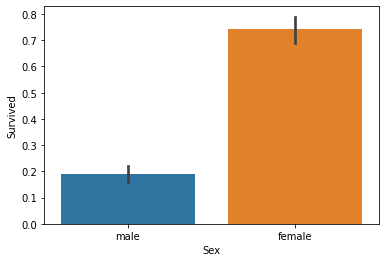

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

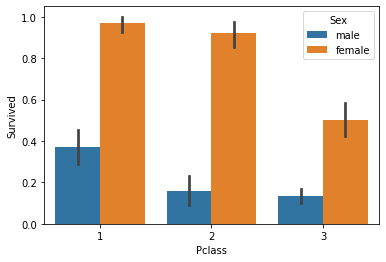

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

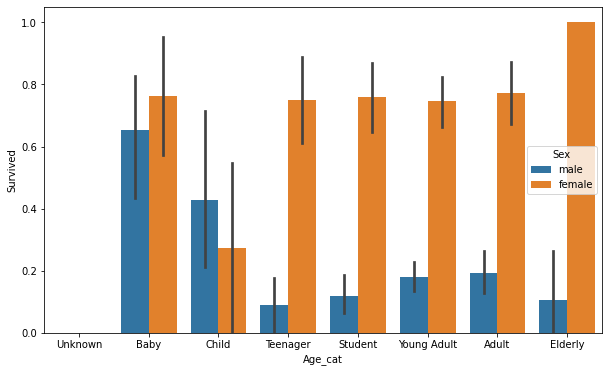

In [13]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <=12 : cat = 'Child'
    elif age <=18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize = (10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x :get_category(x))
sns.barplot(x = 'Age_cat', y='Survived', hue = 'Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace =True)

In [16]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
print(titanic_df.head())
print("----------------------------------------------------")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked  
0         A/5 21171   7.2500      7         3  
1          PC 17599  71.2833      2         0  
2  STON/O2. 3101282   7.9250      7         3  
3            113803  53.1000      2         3  
4            373450   8.0500      7         3  
--------

In [19]:
# null 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace = True)
                     
    return df

# 불피요한 속성 제거 
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
        
    return df


# 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [20]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)

x_titanic_df = transform_features(x_titanic_df)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print("----------------------------------------------------")

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print("----------------------------------------------------")

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegrssion 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print("----------------------------------------------------")

DecisionTreeClassifier 정확도 : 0.7877
----------------------------------------------------
RandomForestClassifier 정확도 : 0.8547
----------------------------------------------------
LogisticRegrssion 정확도 : 0.8492
----------------------------------------------------


/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
